In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [189]:
train = pd.read_csv('data/train.csv')

In [190]:
train.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [191]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [192]:
train.isna().sum() / len(train)

id          0.000000
date        0.000000
country     0.000000
store       0.000000
product     0.000000
num_sold    0.038548
dtype: float64

In [193]:
train[train.num_sold.isna()]

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
45,45,2010-01-01,Kenya,Discount Stickers,Holographic Goose,NaN
90,90,2010-01-02,Canada,Discount Stickers,Holographic Goose,NaN
135,135,2010-01-02,Kenya,Discount Stickers,Holographic Goose,NaN
180,180,2010-01-03,Canada,Discount Stickers,Holographic Goose,NaN
...,...,...,...,...,...,...
229905,229905,2016-12-29,Kenya,Discount Stickers,Holographic Goose,NaN
229950,229950,2016-12-30,Canada,Discount Stickers,Holographic Goose,NaN
229995,229995,2016-12-30,Kenya,Discount Stickers,Holographic Goose,NaN
230040,230040,2016-12-31,Canada,Discount Stickers,Holographic Goose,NaN


<Axes: xlabel='num_sold', ylabel='Density'>

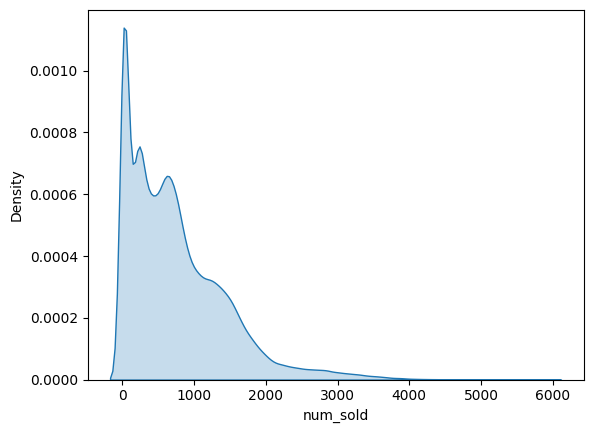

In [194]:
sns.kdeplot(train.num_sold, fill=True)

In [195]:
train['num_sold'] = train.num_sold.fillna(train.num_sold.median())

In [196]:
[(i, train[i].nunique(), train[i].unique()) if train[i].nunique() <= 10 else (i, train[i].nunique()) for i in train.columns]

[('id', 230130),
 ('date', 2557),
 ('country',
  6,
  array(['Canada', 'Finland', 'Italy', 'Kenya', 'Norway', 'Singapore'],
        dtype=object)),
 ('store',
  3,
  array(['Discount Stickers', 'Stickers for Less', 'Premium Sticker Mart'],
        dtype=object)),
 ('product',
  5,
  array(['Holographic Goose', 'Kaggle', 'Kaggle Tiers', 'Kerneler',
         'Kerneler Dark Mode'], dtype=object)),
 ('num_sold', 4037)]

In [197]:
X_train = train.drop('num_sold', axis=1)
y_train = train.num_sold

In [198]:
X_train.columns

Index(['id', 'date', 'country', 'store', 'product'], dtype='object')

In [199]:
class AddDateFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_new = X.copy()
        X_new['date'] = pd.to_datetime(X_new.date)
        X_new['year'] = X_new.date.dt.year
        X_new['month'] = X_new.date.dt.month
        X_new['day'] = X_new.date.dt.day
        
        X_new.drop(['id','date'], axis=1, inplace=True)
        
        return X_new

In [200]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [201]:
categorical_columns = ['country', 'store', 'product']

In [202]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns)
    ])

In [204]:
pipeline = Pipeline([
    ('date', AddDateFeatures()),
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [205]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('date', AddDateFeatures()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country', 'store',
                                                   'product'])])),
                ('classifier', RandomForestClassifier())])

In [184]:
# pipeline.named_steps['date'].transform(X_train)

In [206]:
X_train

,id,date,country,store,product
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose
1,1,2010-01-01,Canada,Discount Stickers,Kaggle
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers
3,3,2010-01-01,Canada,Discount Stickers,Kerneler
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode
...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler


In [207]:
test = pd.read_csv('data/test.csv')

In [209]:
test.head()

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [212]:
y_test = pipeline.predict(test)

In [227]:
result = pd.DataFrame(y_test, columns=['num_sold'])

In [231]:
test.join(result)[['id', 'num_sold']].to_csv('submission.csv')